 **<div style="text-align: center; color: black; font-size: 30px;">Insurance Risk & Claims</div>**

#### Import the Library

In [4]:
import pandas as pd
import numpy as np
from faker import Faker
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


#### Create Synthetic Dataset 

In [6]:
# Initialize Faker
fake = Faker()

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Number of records
data_size = 5000

In [9]:
# Generate synthetic data

# Unique policy IDs as strings
policy_ids = [str(fake.uuid4()) for _ in range(data_size)]

# Policyholder age (between 18 and 80)
customer_ages = np.random.randint(18, 80, data_size)

# Gender distribution (Male, Female, Other with probabilities)
genders = np.random.choice(['Male', 'Female', 'Other'], data_size, p=[0.48, 0.48, 0.04])

# Insurance policy types
policy_types = np.random.choice(['Health', 'Auto', 'Life', 'Property'], data_size)

# Annual income in USD (random float rounded to 2 decimal places)
annual_incomes = np.round(np.random.uniform(20000, 150000, data_size), 2)

# Age of vehicle or property associated with the policy (0 to 30 years)
vehicle_property_ages = np.random.randint(0, 30, data_size)

# Number of past claims
claim_histories = np.random.randint(0, 10, data_size)

# Fraudulent claim flag (1 = Fraud, 0 = Genuine, with probabilities)
fraudulent_claims = np.random.choice([0, 1], data_size, p=[0.85, 0.15])

# Premium amount paid (random float between $500 and $5000)
premium_amounts = np.round(np.random.uniform(500, 5000, data_size), 2)

# Claim amount requested (random float between $100 and $50,000)
claim_amounts = np.round(np.random.uniform(100, 50000, data_size), 2)

# Risk assessment scores (Low, Medium, High with given probabilities)
risk_scores = np.random.choice(['Low', 'Medium', 'High'], data_size, p=[0.5, 0.35, 0.15])

In [10]:
# Create DataFrame
df_risk = pd.DataFrame({
    'Policy_ID': policy_ids,
    'Customer_Age': customer_ages,
    'Gender': genders,
    'Policy_Type': policy_types,
    'Annual_Income': annual_incomes,
    'Vehicle_Property_Age': vehicle_property_ages,
    'Claim_History': claim_histories,
    'Fraudulent_Claim': fraudulent_claims,
    'Premium_Amount': premium_amounts,
    'Claim_Amount': claim_amounts,
    'Risk_Score': risk_scores
})

In [11]:
# Save dataset to CSV file
df_risk.to_csv('synthetic_insurance_data.csv', index=False)

#### Data Analysis & Inspection

In [13]:
# printing the first 5 rows of the dataframe
df_risk.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Vehicle_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,64e762f7-0c19-4c90-8ee8-e1e0545de620,56,Female,Health,105253.52,23,0,0,1924.62,29713.11,Medium
1,9c428b2e-6a23-4916-86a1-50bb0b5bd951,69,Male,Health,84613.07,19,7,0,1807.19,46391.41,Low
2,baa33f60-7dae-4cc5-82d2-e04771ce5846,46,Female,Health,24168.26,15,4,0,2707.11,19749.75,High
3,aa76a0c9-1be9-4f07-a834-1fa08470a208,32,Female,Life,99600.47,29,4,0,1341.95,5182.00,Low
4,11fb431b-f27c-4d48-bf7b-adf15b93c2d1,60,Male,Health,113102.60,19,5,0,2606.54,16358.73,Low


In [14]:
# number of rows and columns in the data frame
df_risk.shape

(5000, 11)

In [15]:
# getting more information about the dataset
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Policy_ID             5000 non-null   object 
 1   Customer_Age          5000 non-null   int32  
 2   Gender                5000 non-null   object 
 3   Policy_Type           5000 non-null   object 
 4   Annual_Income         5000 non-null   float64
 5   Vehicle_Property_Age  5000 non-null   int32  
 6   Claim_History         5000 non-null   int32  
 7   Fraudulent_Claim      5000 non-null   int32  
 8   Premium_Amount        5000 non-null   float64
 9   Claim_Amount          5000 non-null   float64
 10  Risk_Score            5000 non-null   object 
dtypes: float64(3), int32(4), object(4)
memory usage: 351.7+ KB


In [16]:
# checking the missing values in each column
df_risk.isnull().sum()

Policy_ID               0
Customer_Age            0
Gender                  0
Policy_Type             0
Annual_Income           0
Vehicle_Property_Age    0
Claim_History           0
Fraudulent_Claim        0
Premium_Amount          0
Claim_Amount            0
Risk_Score              0
dtype: int64

In [17]:
# Count the total number of duplicate rows in the dataset.
df_risk.duplicated().sum()

0

In [18]:
# getting some statistical measures about the data
df_risk.describe()

,Customer_Age,Annual_Income,Vehicle_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,48.805600,85067.924974,14.360800,4.46520,0.150200,2780.422128,24766.662144
std,17.906991,37772.600747,8.601989,2.82517,0.357303,1291.878177,14425.167102
min,18.000000,20020.510000,0.000000,0.00000,0.000000,500.090000,105.110000
25%,34.000000,51940.737500,7.000000,2.00000,0.000000,1674.380000,12479.122500
50%,49.000000,84341.145000,14.000000,4.00000,0.000000,2806.710000,24724.630000
75%,64.000000,118662.922500,22.000000,7.00000,0.000000,3903.147500,37182.955000
max,79.000000,149974.670000,29.000000,9.00000,1.000000,4999.880000,49994.990000


#### Exploratory Data Analysis (EDA)

In [20]:
import warnings

# Corrected line
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

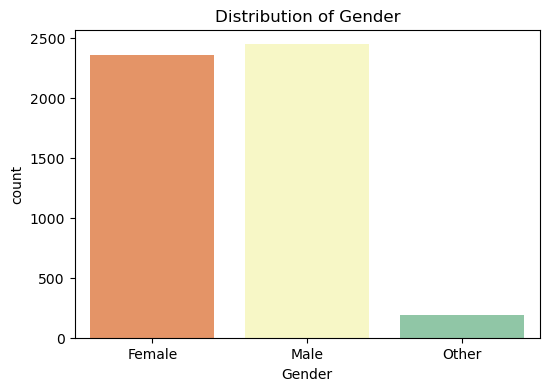

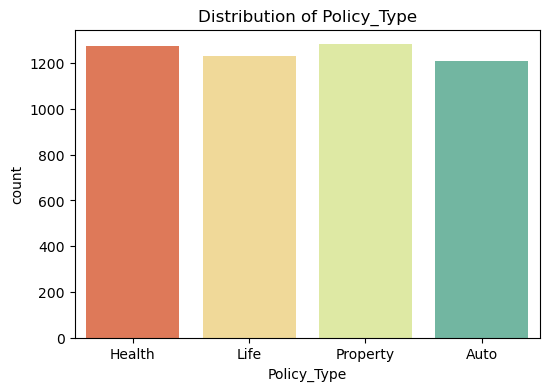

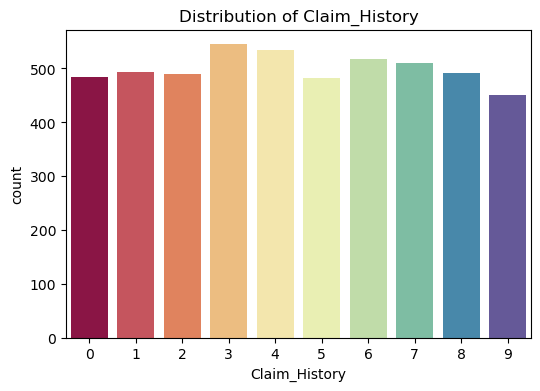

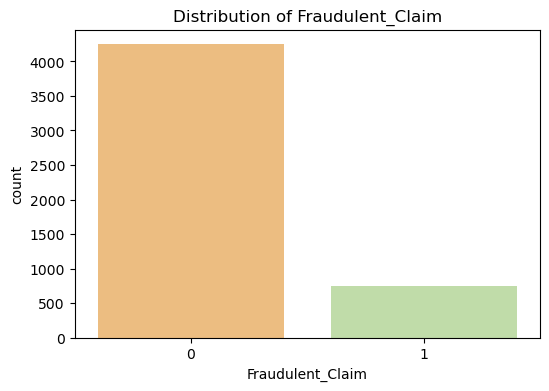

In [21]:
# Categorical Variables
categorical_cols = ['Gender', 'Policy_Type', 'Claim_History', 'Fraudulent_Claim']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_risk, x=col, hue=col, palette="Spectral",legend=False)  # Explicitly set hue=None
    plt.title(f"Distribution of {col}")
    plt.show()

##  Gender Distribution
- **Male & Female policyholders are nearly equal**, showing a balanced customer base.
- **Low representation of 'Other' category**, suggesting potential gaps in market inclusivity.
- **Gender-based claim patterns** could highlight risk tendencies and fraud likelihood.
- **Targeted insurance strategies** can be optimized based on gender trends in claims.



## Policy Type Distribution

- **Balanced distribution** across Health, Life, Property, and Auto policies, ensuring diversified risk.  
- **Property & Health policies slightly dominate**, indicating higher customer demand in these areas.  
- **Auto policies have the lowest count**, which may reflect lower adoption or stricter eligibility criteria.  
- **Tailored risk strategies** can be developed by analyzing claim trends within each policy type.   


## Claim History Distribution 

- **Even claim distribution** suggests a diverse customer base with varied claim frequencies.  
- **Slightly higher claims in mid-range (3-6)** indicate a trend in moderate claim patterns.  
- **Lower claim count for 9+ history** may suggest fewer high-risk policyholders or stricter regulations.  
- **Understanding claim frequency trends** helps in detecting fraud and optimizing premium strategies. ✅  


## Fraudulent Claim Analysis  

- **Fraudulent claims are significantly lower than genuine claims** – indicating effective fraud prevention or underreported fraud.  
- **Over 80% of claims are genuine**, suggesting a majority of policyholders follow ethical practices.  
- **Identifying fraud patterns from existing cases** can enhance predictive models and detection strategies.  
- **Further analysis is needed** to understand why fraud occurs and how to minimize potential risks.   


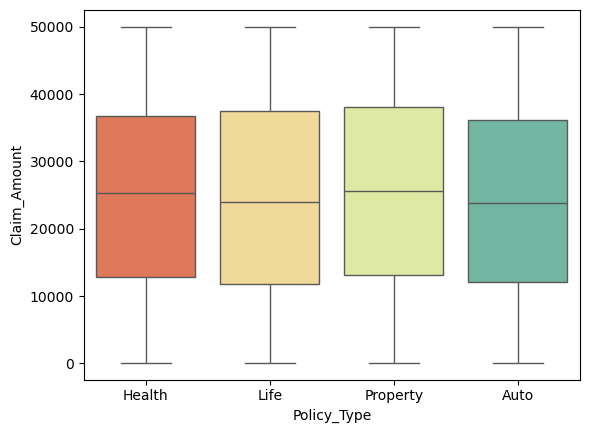

In [26]:
# Boxplot for Claim Amount by Policy Type
sns.boxplot(data=df_risk, x='Policy_Type', y='Claim_Amount', palette="Spectral")
plt.show()

## Claim Amount Distribution Across Policy Types  

- **Consistent Claim Distributions**: All policy types show similar claim amount distributions, with medians around the same range.  
- **Wide Range of Claim Amounts**: Claims vary significantly, from minimal payouts to high-value claims reaching $50,000.  
- **Potential Outliers**: Some claims extend beyond typical limits, indicating possible anomalies or high-risk claims.  
- **Balanced Policy Performance**: No significant differences in claim amounts across policy types, suggesting fair risk distribution.  


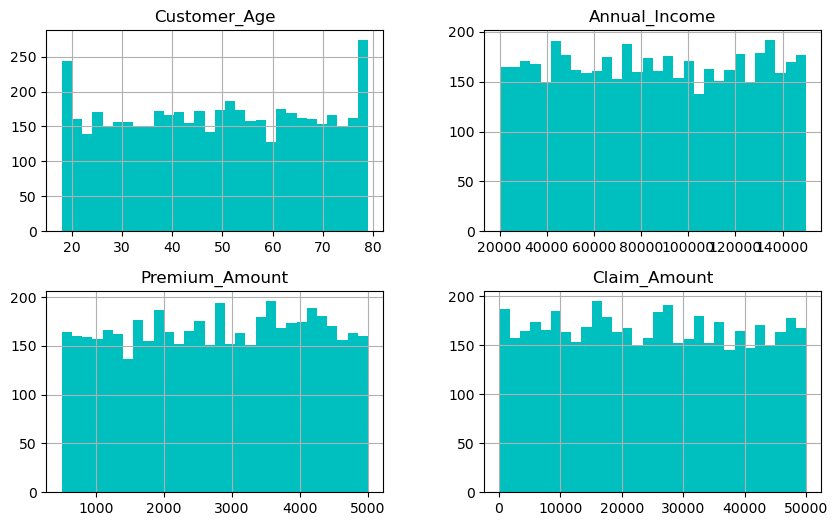

In [28]:
# Numerical Variables
numerical_cols = ['Customer_Age', 'Annual_Income', 'Premium_Amount', 'Claim_Amount', 'Risk_Score']
df_risk[numerical_cols].hist(bins=30, figsize=(10,6), color='c')
plt.show()

## Data Distribution  

- **Diverse Customer Age Groups**: Customers range from young adults to seniors, with peaks at early 20s and late 70s.  
- **Annual Income Spread**: Income levels are well-distributed, indicating a balanced mix of customers across economic classes.  
- **Premium Amount Variability**: Premiums show a wide range, suggesting different risk categories and policy types.  
- **Even Claim Amount Distribution**: Claim payouts are fairly distributed, indicating no significant bias in claim approvals.  


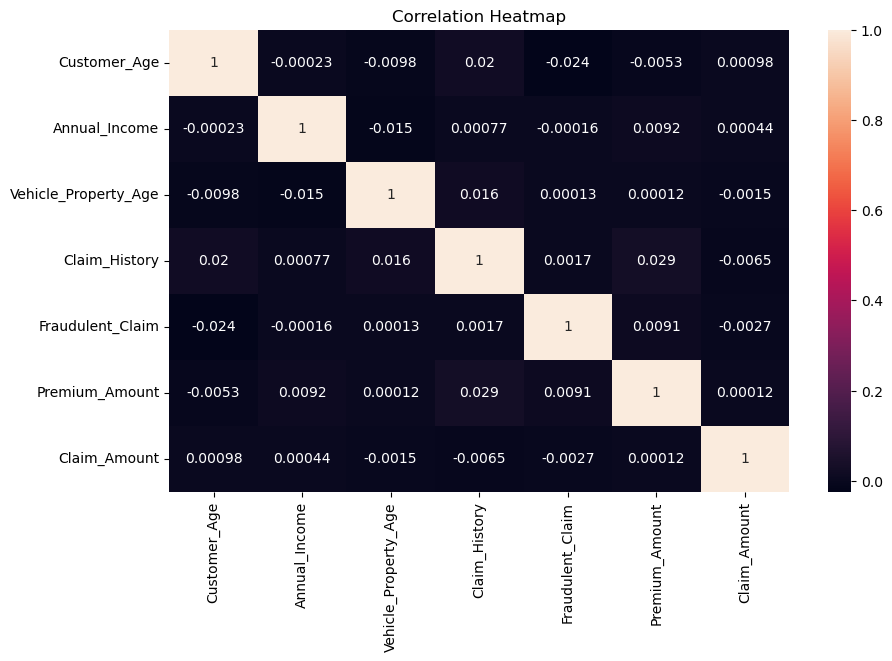

In [30]:
# Selecting only numeric columns for correlation
numeric_df = df_risk.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

##  Key Insights from Correlation Heatmap  

- **Weak Correlations**: No strong correlations exist between the variables, indicating minimal direct relationships.  
- **Fraudulent Claims Independence**: Fraudulent claims have very low correlation with other features, implying they may be driven by complex, non-linear factors.  
- **Premium & Claim Amounts**: Premium and claim amounts show little correlation, suggesting claim amounts do not necessarily depend on premium values.  
- **Customer Age & Claims**: Age has an almost negligible impact on claim amounts and fraudulent claims, meaning fraud risk is not age-dependent.  


#### Data Pre-Processing

##### Encoding Categorical Data
 --------------------------------------
 Applying encoding techniques to convert categorical data into numerical format
 - One-Hot Encoding for 'Policy_Type' and 'Gender'
 - Label Encoding for 'Risk_Score' (Low → 0, Medium → 1, High → 2)

In [34]:
# Step 1: One-Hot Encoding for 'Policy_Type' and 'Gender'
df_risk = pd.get_dummies(df_risk, columns=['Policy_Type', 'Gender'], prefix=['Policy', 'Gender'], drop_first=False)

# Step 2: Convert only the One-Hot Encoded columns to integers (1/0)
one_hot_columns = df_risk.select_dtypes(include=['bool']).columns  # Select only boolean columns
df_risk[one_hot_columns] = df_risk[one_hot_columns].astype(int) 

In [35]:
# Step 2: Label Encoding for 'Risk_Score'
label_encoder = LabelEncoder()
df_risk['Risk_Score'] = label_encoder.fit_transform(df_risk['Risk_Score'])


In [36]:
# Display the dataset after encoding
print("\nDataset After Encoding:")
print(df_risk)


Dataset After Encoding:
                                 Policy_ID  Customer_Age  Annual_Income  \
0     64e762f7-0c19-4c90-8ee8-e1e0545de620            56      105253.52   
1     9c428b2e-6a23-4916-86a1-50bb0b5bd951            69       84613.07   
2     baa33f60-7dae-4cc5-82d2-e04771ce5846            46       24168.26   
3     aa76a0c9-1be9-4f07-a834-1fa08470a208            32       99600.47   
4     11fb431b-f27c-4d48-bf7b-adf15b93c2d1            60      113102.60   
...                                    ...           ...            ...   
4995  aeee32cb-b023-4593-b8ad-ddaf841874f8            42       64525.00   
4996  41602dde-4bee-4edb-be46-1fcfc3f11e17            39       29990.43   
4997  904c97a9-3b24-4220-ac2f-716363091d32            48       71082.78   
4998  e58fc7b0-3fe2-49f4-a378-e951da2ac784            34      107090.42   
4999  546f107c-9a33-4f94-a45b-a9b18ef14ff9            72       81085.69   

      Vehicle_Property_Age  Claim_History  Fraudulent_Claim  Premium_Amoun

##### Feature Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
numeric_cols = ['Annual_Income', 'Claim_Amount', 'Premium_Amount']

# Apply scaling
df_risk[numeric_cols] = scaler.fit_transform(df_risk[numeric_cols])


#### Outlier Detection

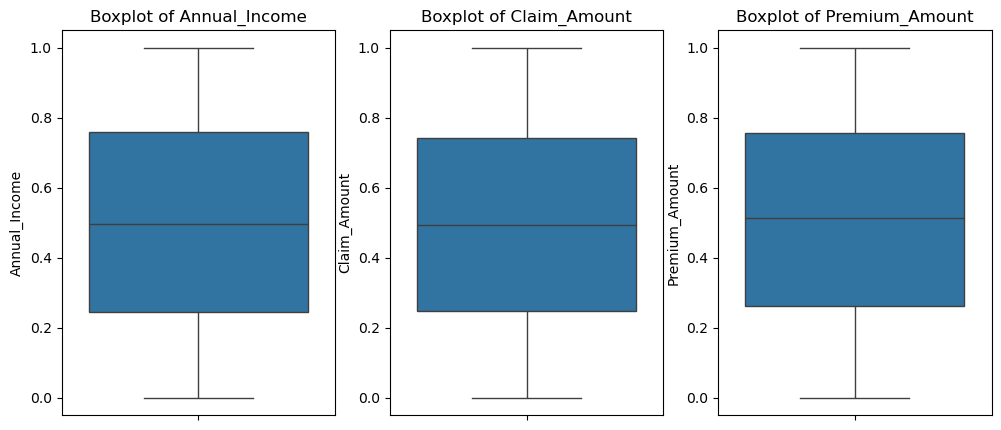

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to check
num_features = ['Annual_Income', 'Claim_Amount', 'Premium_Amount']

# Plot boxplots
plt.figure(figsize=(12, 5))
for i, feature in enumerate(num_features):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=df_risk[feature])
    plt.title(f"Boxplot of {feature}")

plt.show()


## Outlier Detection Analysis

- **Balanced Data Distribution**   
  The boxplots indicate a **well-distributed dataset** with minimal extreme values, ensuring stable model training.

- **No Significant Outliers**   
  The absence of extreme outliers suggests that **financial data (Annual_Income, Claim_Amount, Premium_Amount) is clean**, reducing the risk of biased predictions.

- **Improved Model Reliability**   
  Since the data is well-scaled and normally distributed, the **fraud detection model will be more accurate and unbiased**.



#### Fraud Detection Anomaly Tagging

In [43]:
from sklearn.ensemble import IsolationForest
from tensorflow import keras
from tensorflow.keras import layers

##### Apply Isolation Forest

In [45]:
# Initialize Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit model & predict anomalies
df_risk['Anomaly_IF'] = iso_forest.fit_predict(df_risk[num_features])  # -1: Anomaly, 1: Normal

# Convert -1 (Anomaly) to 1 and 1 (Normal) to 0 for easy understanding
df_risk['Anomaly_IF'] = df_risk['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)


In [46]:
df_risk.columns

Index(['Policy_ID', 'Customer_Age', 'Annual_Income', 'Vehicle_Property_Age',
       'Claim_History', 'Fraudulent_Claim', 'Premium_Amount', 'Claim_Amount',
       'Risk_Score', 'Policy_Auto', 'Policy_Health', 'Policy_Life',
       'Policy_Property', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Anomaly_IF'],
      dtype='object')

##### Apply Autoencoder for Anomaly Detection

In [48]:
# Define the Autoencoder model
input_dim = len(num_features)

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(df_risk[num_features], df_risk[num_features], epochs=50, batch_size=16, verbose=0)

# Predict reconstruction error
reconstructed = autoencoder.predict(df_risk[num_features])
reconstruction_error = np.mean(np.abs(reconstructed - df_risk[num_features].values), axis=1)

# Set anomaly threshold (adjust based on dataset)
threshold = np.percentile(reconstruction_error, 95)

# Tag anomalies based on reconstruction error
df_risk['Anomaly_AE'] = (reconstruction_error > threshold).astype(int)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


##### Combine Anomaly Detection Results

In [50]:
# Create a final fraud flag based on both techniques
df_risk['Fraud_Anomaly_Tag'] = df_risk[['Anomaly_IF', 'Anomaly_AE']].max(axis=1)

# Print anomaly counts
print(df_risk[['Anomaly_IF', 'Anomaly_AE', 'Fraud_Anomaly_Tag']].value_counts())

# Save the updated dataset with fraud tagging
df_risk.to_csv("fraud_detected_dataset.csv", index=False)


Anomaly_IF  Anomaly_AE  Fraud_Anomaly_Tag
0           0           0                    4580
            1           1                     170
1           0           1                     170
            1           1                      80
Name: count, dtype: int64


#### Model Buliding

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error


#### Splitting Data

In [54]:
# Drop 'Policy_ID' since it's a unique identifier
df_risk = df_risk.drop(columns=['Policy_ID'], errors='ignore')

In [55]:
# Fraud Detection (Classification Model)
X_class = df_risk.drop(columns=['Fraudulent_Claim'])
y_class = df_risk['Fraudulent_Claim']

# X_class = df_risk.drop(columns=['Fraud_Anomaly_Tag'])
# y_class = df_risk['Fraud_Anomaly_Tag']

In [56]:
# Claim Amount Prediction (Regression Model)
X_reg = df_risk.drop(columns=['Claim_Amount'])
y_reg = df_risk['Claim_Amount']


In [57]:
# Classification (Fraudulent Claim Detection)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Regression (Claim Amount Prediction)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


#### Train Fraud Detection Model 

In [59]:
# Train Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_reg = reg.predict(X_test_reg)

# Evaluate
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Root Mean Square Error (RMSE): {rmse:.2f}")


📌 Mean Absolute Error (MAE): 0.25
📌 Root Mean Square Error (RMSE): 0.29


In [60]:
# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

# Predict
y_pred_class = clf.predict(X_test_class)

# Evaluate
print("📌 Random Forest Classifier Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("📌 AUC-ROC Score:", roc_auc_score(y_test_class, y_pred_class))
print("📌 Classification Report:\n", classification_report(y_test_class, y_pred_class))


📌 Random Forest Classifier Accuracy: 0.85
📌 AUC-ROC Score: 0.5
📌 Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       850
           1       0.00      0.00      0.00       150

    accuracy                           0.85      1000
   macro avg       0.42      0.50      0.46      1000
weighted avg       0.72      0.85      0.78      1000



#### Save the Best Model

In [62]:
import pickle

# Save Random Forest Regressor
with open("random_forest_regressor.pkl", "wb") as reg_file:
    pickle.dump(reg, reg_file)

# Save Random Forest Classifier
with open("random_forest_classifier.pkl", "wb") as clf_file:
    pickle.dump(clf, clf_file)

print(" Models saved successfully in pickle format!")


 Models saved successfully in pickle format!


In [63]:
# Load Random Forest Regressor
with open("random_forest_regressor.pkl", "rb") as reg_file:
    reg_loaded = pickle.load(reg_file)

# Load Random Forest Classifier
with open("random_forest_classifier.pkl", "rb") as clf_file:
    clf_loaded = pickle.load(clf_file)

print(" Models loaded successfully from pickle format!")


 Models loaded successfully from pickle format!


In [64]:
# Predict using the loaded models
y_pred_reg_loaded = reg_loaded.predict(X_test_reg)
y_pred_class_loaded = clf_loaded.predict(X_test_class)

print(" Predictions made using the saved models!")


 Predictions made using the saved models!
